In [1]:
import numpy as np 
import pandas as pd

In [2]:
csv_file = '~/Documents/uni/y3s1/19S1-CE4042-CZ4042-NEURAL NETWORK  DEEP LEARNING/Content/assignment1/admission_predict.csv'

df = pd.read_csv(csv_file, index_col=[0])

In [3]:
df.shape

(400, 8)

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Preperation

In [5]:
from sklearn.model_selection import train_test_split

seed = 10

np.random.seed(seed)

data = df.values
np.random.shuffle(data)

X = data[:, :-1]
y = data[:, -1].reshape(-1,1)

def scale(X, decimals):
    return np.round((X - np.mean(X, axis=0))/ np.std(X, axis=0), decimals=decimals)

X = scale(X, 4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280, 1), (120, 1))

## Define all libraries and functions needed

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.regularizers import l2

from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/heyuhao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Q1

In [7]:
#a)

lr = 1e-3
decay = 1e-3
batch_size = 8
epochs = 10000
epochs_interval =100
early_stop_threshold = 1e-2

model = Sequential([
    Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

val_loss=[100]

for i in range(epochs//epochs_interval):
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs_interval, verbose=0, validation_data=(X_test, y_test), shuffle=True)
    val_loss.append(h.history['val_loss'][-1])
    print(epochs_interval*(i+1),val_loss[-1])
    
    # if val loss increase less than early stop thrshold, then stop
    if val_loss[-1] * (1+early_stop_threshold) > val_loss[-2]:
        break
        

# plt.figure()
# plt.plot(h.history['loss'])
# plt.plot(h.history['val_loss'])
# plt.title('mse')
# plt.xlabel('epoch')
# plt.legend(['train_mean_squared_error', 'val_mean_squared_error',], loc='upper left')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
100 0.033710671588778496
200 0.024749319752057394
300 0.02138056649516026
400 0.019431484366456666
500 0.018084276715914407
600 0.01708941931525866
700 0.016332504029075306
800 0.01574042849242687
900 0.01524644394715627
1000 0.014823542286952337
1100 0.014472523890435695
1200 0.014170759171247483
1300 0.013895522678891818
1400 0.01364471527437369
1500 0.013414090933899085
1600 0.013202842883765697
1700 0.013012994825839997
1800 0.012825616573294004
1900 0.012659501160184543
2000 0.012502263734738032
2100 0.012356318533420563
2200 0.012221368153889973
2300 0.012083962994317214
2400 0.011952485019961993
2500 0.011825671605765819
2600 0.011697390985985597
2700 0.011579793660591047
2800 0.011467948214461406


(50, 7) (50, 1)
mean root square error:  0.0689779303188416


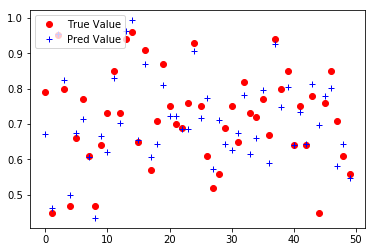

In [8]:
# c)
_, X_test_50, _, y_test_50 = train_test_split(X_test, y_test, test_size=50, random_state=42)
print(X_test_50.shape, y_test_50.shape)

y_pred_50 = model.predict(x=X_test_50)
print('mean root square error: ', np.sqrt(mean_squared_error(y_test_50, y_pred_50)))

plt.figure()
plt.plot(y_test_50, 'ro')
plt.plot(y_pred_50, 'b+')
plt.legend(['True Value', 'Pred Value',], loc='upper left')

## Q2.Correlation Matrix

In [14]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


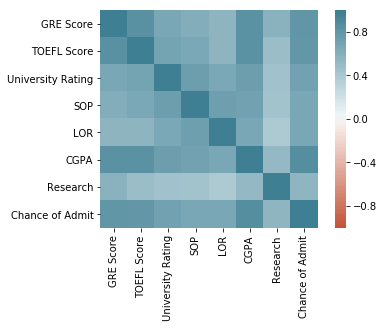

In [15]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


In [16]:
#a) most correlated features
max_corr_extent=0
max_corr_index=(-1,-1)
for i in range(len(corr)-1):
    for j in range(i+1, len(corr)-1):
        if corr.iloc[i,j] > max_corr_extent:
            max_corr_extent = corr.iloc[i,j]
            max_corr_index=(i,j)
            
corr.columns[max_corr_index[0]], corr.columns[max_corr_index[1]], max_corr_extent

('GRE Score', 'TOEFL Score', 0.8359768030143953)

In [17]:
#b) 
related_feature_of_admit = [(corr.columns[i], corr.iloc[-1, i]) for i in (np.argsort(corr.iloc[-1,:-1].tolist())[::-1])]
related_feature_of_admit[0]

('CGPA', 0.8732890993553011)

## Q3 Recuisive Feature Elimination

In [10]:
#a) keep 6 features

features = list(df.columns)[:-1]
print(features, '\n')

mse = dict(zip(features, [0 for i in features]))

epochs=2800

for i in range(len(features)):
    
    excluded_feature = features[i]
    
    print(f'\nremoved {excluded_feature}...')
    print(f'feature kept: {[f for f in features if f!=excluded_feature]}')
    
    X_train_removed, X_test_removed = np.delete(X_train, obj=i, axis=1), np.delete(X_test, obj=i, axis=1)
    
    print(f'training shape: {X_train_removed.shape}')
    
    model = Sequential([
    Dense(10, input_dim=X_train_removed.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

    model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

    h = model.fit(X_train_removed, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test_removed, y_test), shuffle=True)
    
    mse[excluded_feature] = h.history['val_loss'][-1]
    
    print(f'mse: {mse[excluded_feature]}')
    
mse

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'] 


removed GRE Score...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.01006181004146735

removed TOEFL Score...
feature kept: ['GRE Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.014574812538921834

removed University Rating...
feature kept: ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.01132212948674957

removed SOP...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.011093617292741935

removed LOR...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.01304549981529514

removed CGPA...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'Research']
training shape: (280

{'GRE Score': 0.01006181004146735,
 'TOEFL Score': 0.014574812538921834,
 'University Rating': 0.01132212948674957,
 'SOP': 0.011093617292741935,
 'LOR': 0.01304549981529514,
 'CGPA': 0.013039059502383073,
 'Research': 0.012719061908622582}

In [16]:
# if after removed feature1, then the mse is low, then feature1 is not importrant
feature_to_be_removed = min(mse, key=mse.get)
print('remove ', feature_to_be_removed)

#feature1 - features after removing 1 feature
features1 = features.copy()
features1.remove(feature_to_be_removed)
print(features1)

feature_removed_col=np.argmin(list(mse.values()))
X_train1, X_test1 = np.delete(X_train, obj=feature_removed_col, axis=1), np.delete(X_test, obj=feature_removed_col, axis=1)
X_train1.shape, X_test1.shape

remove,  GRE Score
['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']


((280, 6), (120, 6))

In [ ]:
# removed feature is GRE Score

# the reason might be 
# ('GRE Score', 'TOEFL Score', 0.8359768030143953)
# high correlation

In [ ]:
# remove second feature

In [20]:
mse1 = dict(zip(features1, [0 for i in features1]))

epochs=2800

for i in range(len(features1)):
    
    excluded_feature = features1[i]
    
    print(f'\nremoved {excluded_feature}...')
    print(f'feature kept: {[f for f in features1 if f!=excluded_feature]}')
    
    X_train_removed, X_test_removed = np.delete(X_train1, obj=i, axis=1), np.delete(X_test1, obj=i, axis=1)
    
    print(f'training shape: {X_train_removed.shape}')
    
    model = Sequential([
    Dense(10, input_dim=X_train_removed.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

    model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

    h = model.fit(X_train_removed, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test_removed, y_test), shuffle=True)
    
    mse1[excluded_feature] = h.history['val_loss'][-1]
    
    print(f'mse: {mse1[excluded_feature]}')
    
mse1


removed TOEFL Score...
feature kept: ['University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 5)
mse: 0.012207423740377029

removed University Rating...
feature kept: ['TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 5)
mse: 0.015514141879975796

removed SOP...
feature kept: ['TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research']
training shape: (280, 5)
mse: 0.011512114821622768

removed LOR...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research']
training shape: (280, 5)
mse: 0.012567080433170001

removed CGPA...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'Research']
training shape: (280, 5)
mse: 0.012626465223729611

removed Research...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
training shape: (280, 5)
mse: 0.010937654847900073


{'TOEFL Score': 0.012207423740377029,
 'University Rating': 0.015514141879975796,
 'SOP': 0.011512114821622768,
 'LOR': 0.012567080433170001,
 'CGPA': 0.012626465223729611,
 'Research': 0.010937654847900073}

In [21]:
feature_to_be_removed = min(mse1, key=mse1.get)
print('remove ', feature_to_be_removed)

#feature1 - features after removing 1 feature
features2 = features1.copy()
features2.remove(feature_to_be_removed)
print(features2)

feature_removed_col=np.argmin(list(mse1.values()))
X_train2, X_test2 = np.delete(X_train1, obj=feature_removed_col, axis=1), np.delete(X_test1, obj=feature_removed_col, axis=1)
X_train2.shape, X_test2.shape

remove  Research
['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']


((280, 5), (120, 5))

In [ ]:
# removed feature is GRE Score

# the reason might be 
# low correlation with y

## Q4

In [ ]:
# X_train2, X_test2 is used in Q4

## TODO 
train 2800 or train until converge?? (threshold)

************************************************** 0 **************************************************
100 0.030556149904926617
200 0.023577830009162425
300 0.021156029030680656
400 0.019627236202359198
500 0.018565130047500135
600 0.017773788794875144
700 0.01714963521808386
800 0.016658687591552736
900 0.01625602344671885
1000 0.015909720646838345
1100 0.015590545100470385
1200 0.01529149804264307
1300 0.015003662928938866
1400 0.014739800182481607
1500 0.014494746923446655
1600 0.014253259201844533
1700 0.014034042259057362
1800 0.013832228134075801
1900 0.013648241572082043
2000 0.01347628173728784
2100 0.013313808292150498
2200 0.013155350834131241
2300 0.01300467699766159
2400 0.01286374752720197
2500 0.012729396174351374
2600 0.012601908482611179
2700 0.012479087213675182
------------------------------ 25 2700 0.012479087213675182 ------------------------------ 



************************************************** 1 **************************************************
100 0.1680

12200 0.031388958791891734
12300 0.031033417209982872
12400 0.03067882942656676
12500 0.03032646564145883
12600 0.029987470184763273
12700 0.029652090619007747
12800 0.029320053383708
12900 0.02899095999697844
13000 0.02866464008887609
13100 0.02835083839794
13200 0.02803375485042731
13300 0.027720832700530686
13400 0.02742288721104463
13500 0.02712219680349032
13600 0.02682263726989428
13700 0.026528651639819146
13800 0.026244515801469484
13900 0.025963699569304784
14000 0.025681836530566216
14100 0.025409456963340443
14200 0.02513271210094293
14300 0.024871732294559478
14400 0.02460615485906601
14500 0.024341434488693872
14600 0.02408502288162708
14700 0.02383228006462256
14800 0.023586525892217953
14900 0.023344820737838744
15000 0.023102487623691558
15100 0.022862310086687408
15200 0.022628184407949448
15300 0.02239854261279106
15400 0.02217283397912979
15500 0.021948440993825594
15600 0.021732217445969582
------------------------------ 154 15600 0.021732217445969582 --------------

8400 0.08142088254292806
8500 0.08038786699374517
8600 0.07935516734917959
8700 0.07834567427635193
8800 0.07734975665807724
8900 0.07636279016733169
9000 0.07537877609332402
9100 0.07442847241957982
9200 0.07348712434371313
9300 0.07254957109689712
9400 0.07164105921983718
9500 0.07073358694712321
9600 0.06982957025369009
9700 0.06896034280459086
9800 0.06808332602183025
9900 0.06722925156354904
10000 0.06640383650859197
10100 0.06556103924910227
10200 0.0647539272904396
10300 0.06394545336564382
10400 0.06315562948584556
10500 0.062368766963481904
10600 0.06159791350364685
10700 0.06083489706118902
10800 0.060079767803351086
10900 0.05934187223513921
11000 0.05861506760120392
11100 0.057899210353692374
11200 0.05719013984004657
11300 0.056499686340490976
11400 0.055798329412937164
11500 0.05512722432613373
11600 0.0544589638710022
11700 0.053804121911525726
11800 0.053155632317066194
11900 0.052513395249843595
12000 0.05187853624423345
12100 0.051266922056674956
12200 0.0506535825630

[0.012479087213675182,
 0.022795908773938816,
 0.021732217445969582,
 0.02461871181925138,
 0.026381365209817886]

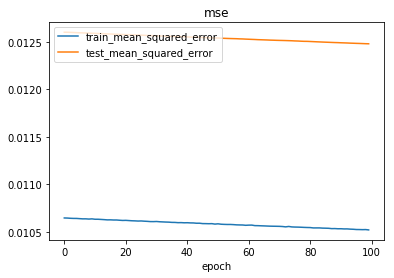

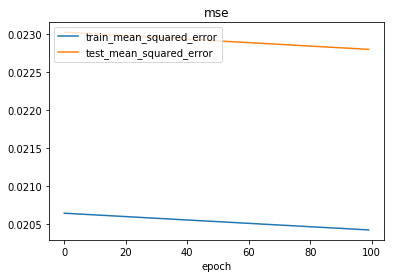

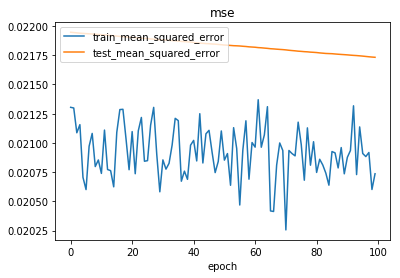

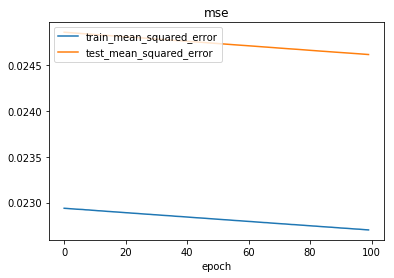

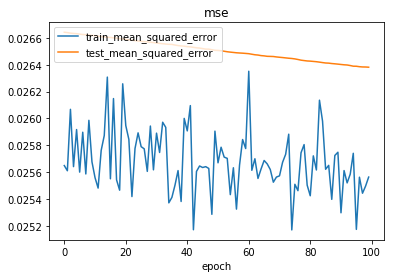

In [36]:
model_layer3_without_dropout = Sequential([
    Dense(10, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model_layer4_without_dropout = Sequential([
    
    Dense(50, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model_layer4_with_dropout = Sequential([
    
    Dense(50, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])
    
model_layer5_without_dropout = Sequential([
    
    Dense(50, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model_layer5_with_dropout = Sequential([
    
    Dense(50, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])
    
    
model_layer4_without_dropout.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

model_layer4_with_dropout.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

model_layer5_without_dropout.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

model_layer5_with_dropout.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')


epochs=20000
epochs_interval =100
early_stop_threshold = 1e-2
lr=1e-3
mse2 = []


models = [model_layer3_without_dropout ,model_layer4_without_dropout, model_layer4_with_dropout, model_layer5_without_dropout, model_layer5_with_dropout]

for i, m in enumerate(models):
    
    print('*'*50, i, '*'*50,)
    
    m.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')
    
    val_loss=[100]
    
    for i in range(epochs//epochs_interval):
        
        h = m.fit(X_train2, y_train, batch_size=batch_size, epochs=epochs_interval, verbose=0, validation_data=(X_test2, y_test), shuffle=True)
        
        val_loss.append(h.history['val_loss'][-1])
        print(epochs_interval*(i+1),val_loss[-1])

        if val_loss[-1] * (1+early_stop_threshold) > val_loss[-2]:
            break
            
    print('-'*30, i-1, epochs_interval*(i+1), val_loss[-1], '-'*30, '\n\n\n')
    
    mse2.append(val_loss[-1])
    
    plt.figure()
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('mse')
    plt.xlabel('epoch')
    plt.legend(['train_mean_squared_error', 'test_mean_squared_error',], loc='upper left')
    
mse2